# **Libraries**

###   Installs and imports all the Python libraries needed for the project

In [54]:
!pip install kagglehub
import kagglehub
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# **Dataset**

###  Downloads the dataset from Kaggle and loads it into a Pandas DataFrame so we can work with it.

In [55]:
# Download dataset from Kaggle
path = kagglehub.dataset_download('mysarahmadbhat/lung-cancer')

# Load the dataset into a DataFrame
csv_path = os.path.join(path,'survey lung cancer.csv')
df = pd.read_csv(csv_path)

# Display the first 5 rows of the dataset
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **Data Pre-Processing**
###  Checks the dataset structure, handles missing values, removes duplicate rows, and prepares the data for machine learning.

In [56]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [57]:
# Count missing values in each column
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [58]:
# Count duplicate rows
df.duplicated().sum()
# Remove duplicate rows
df = df.drop_duplicates()

# **Feature Selection**
### we separate the input features (X) from the target variable (y). LUNG_CANCER is what we want to predict.

In [59]:
# LUNG_CANCER is the target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# **One Hot-Encoder**
###  Convert categorical data into numerical form so that machine learning models can understand it.

In [60]:
# Convert categorical features to numerical using one-hot encoding for X
X = pd.get_dummies(X, columns=['GENDER'], drop_first=True)

# Convert target variable 'LUNG_CANCER' to (0/1) for y
y = y.map({'NO': 0, 'YES': 1})

# **Feature Scaling**
### Scaling ensures that all features are on the same scale, which improves model performance.

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    LogisticRegression(max_iter=1000),
    X_scaled,
    y,
    cv=skf,
    scoring='accuracy'
)

print("Stratified K-Fold Accuracy:", scores.mean())

Stratified K-Fold Accuracy: 0.9166883116883117


# **Train-Test Split**
### splits the dataset into training and testing data so we can evaluate the model properly.  


In [63]:
# split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    shuffle=True,
    stratify=y
)
# Print Shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (220, 15)
X_test shape: (56, 15)
y_train shape: (220,)
y_test shape: (56,)


# **Model Use**
### We use Logistic Regression is for classification problems.

In [64]:
l = LogisticRegression(max_iter=1000)
model = l.fit(X_train, y_train)

y_pred = model.predict(X_test)

# **Model Evaluation**
### The model performs using accuracy and a classification report.

In [65]:
# Evaluate
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 4  4]
 [ 1 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.92      0.98      0.95        48

    accuracy                           0.91        56
   macro avg       0.86      0.74      0.78        56
weighted avg       0.90      0.91      0.90        56



# **Visualizing**


## Confusion Matrix
### Evaluate the performance of a classification model. It shows how many predictions are:
* #### Correct
* #### Incorrect



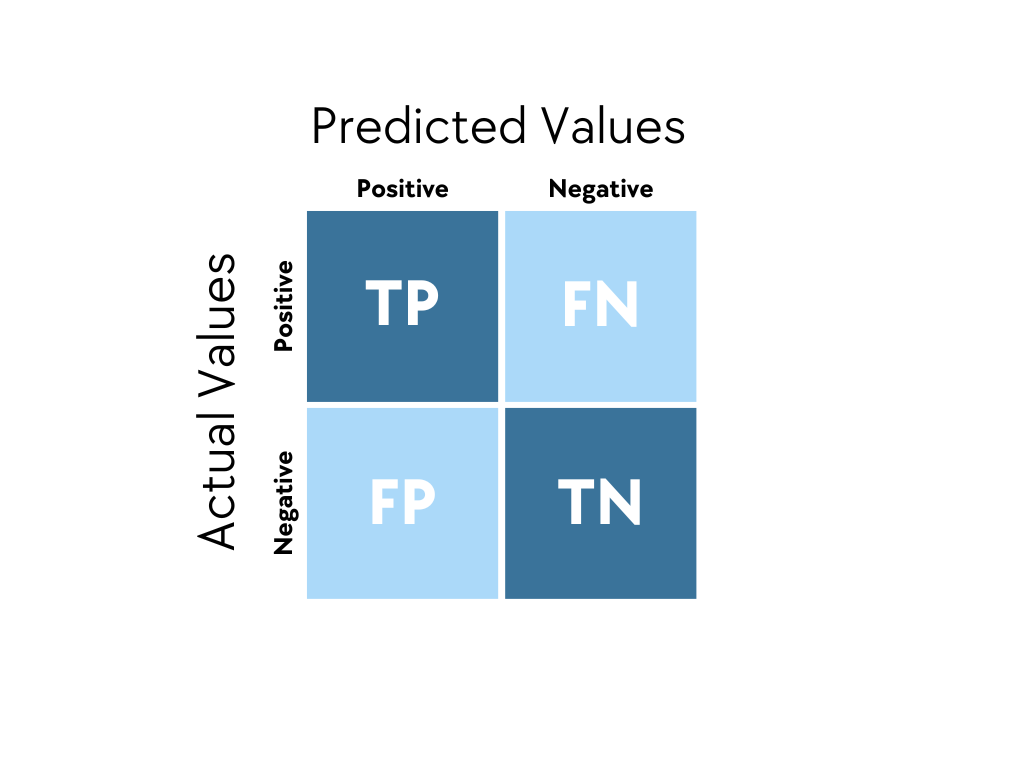
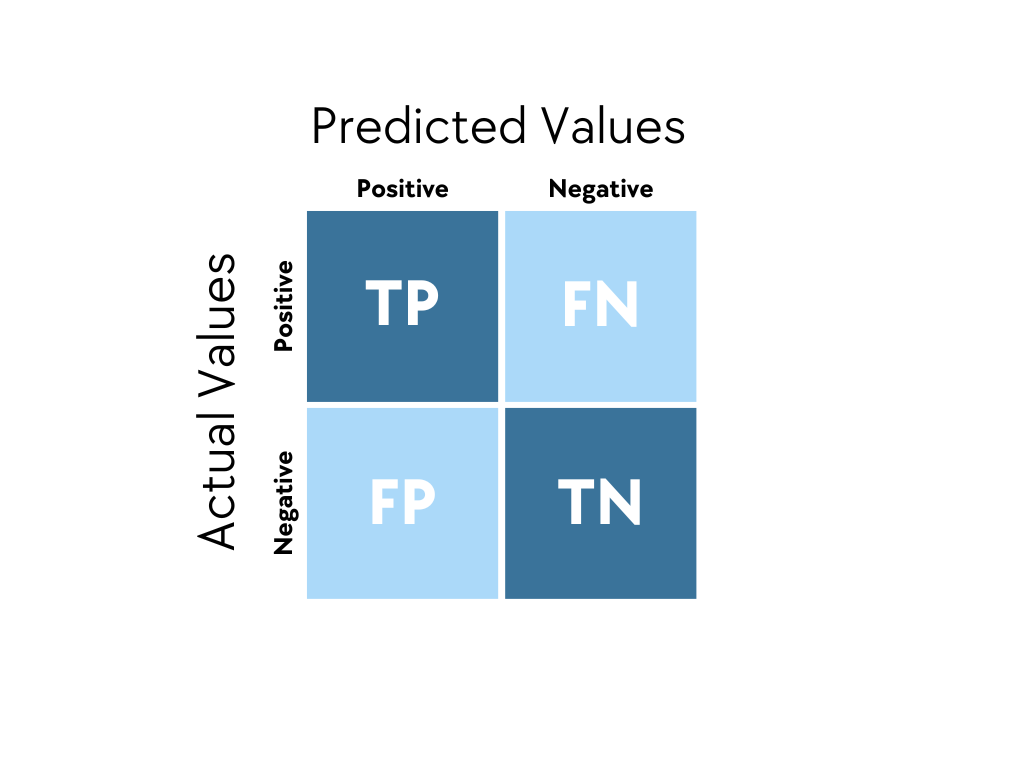

<Axes: >

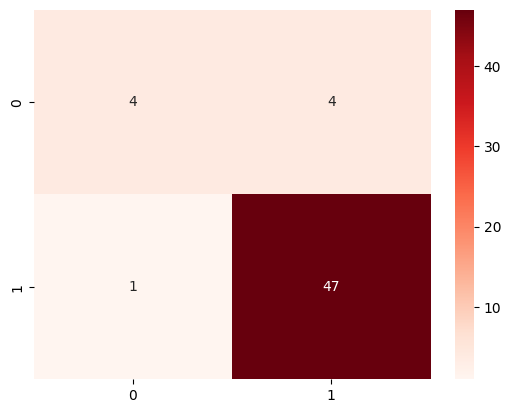

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')

## Lung Cancer Distribution
### Shows the distribution of lung cancer cases in the dataset.

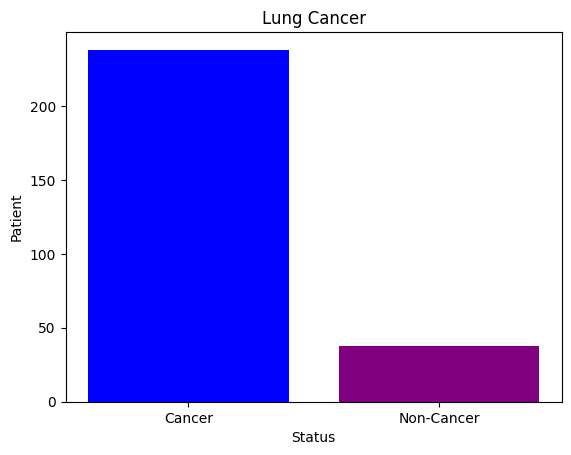

In [67]:
can_count = df['LUNG_CANCER'].value_counts()

label = ['Cancer','Non-Cancer']
count = [can_count.loc['YES'], can_count.loc['NO']]

plt.bar(label,count,color=['blue','purple'])
plt.title('Lung Cancer')
plt.xlabel("Status")
plt.ylabel("Patient")
plt.show()

# **Compare LR with Othe Models**

### Compares Logistic Regression with other machine learning models to check which one performs better. Three models are used:

* #### Logistic Regression

* #### Support Vector Machine (SVM)

* #### Random Forest

In [68]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    score = cross_val_score(model, X_scaled, y, cv=skf, scoring='f1')
    print(name, "F1:", score.mean())


Logistic Regression F1: 0.9525238417930846
SVM F1: 0.9446737015806843
Random Forest F1: 0.9482620076025932
